## Importing necessary Libraries for data handling

In [1]:
import pandas as pd
import numpy as np

## Loading dataset into pandas dataframe
> We are using [Worldwide Petrol-gas Prices Dataset](https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide)

In [2]:
petrol_df = pd.read_csv("Petrol_prices_dataset_june_2022.csv")
# Dispalying first five rows of dataset
petrol_df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8


## Displaying summary of dataset

In [3]:
petrol_df.describe()

,S#,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),xTimes Yearly Gallons Per Capita Buy
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,332.006630,5.695691,1.505138,318.219227,14.204420
std,52.394338,436.558735,4.370484,1.154575,244.192081,48.613866
min,1.000000,2.200000,0.080000,0.020000,4.650000,1.000000
25%,46.000000,53.900000,4.150000,1.100000,232.020000,6.000000
50%,91.000000,180.200000,5.280000,1.400000,295.040000,9.000000
75%,136.000000,424.600000,6.760000,1.790000,377.740000,12.000000
max,181.000000,3679.500000,54.890000,14.500000,3066.750000,654.000000


## Changing 'World share' column entries from string into integers and changing column name

In [4]:
# Declaring a new numpy array 'World_share'
World_share = np.array(petrol_df['World Share'])
# Changing entries of column 'world share'  into integers after removing percentage 
# and storing it in World_share array
for i in range(len(World_share)):
    World_share[i] = World_share[i].translate({ ord("%"): None })
    World_share[i] = int(World_share[i])
# Replacing entries of 'World share' column with World_share array
petrol_df['World Share'] = World_share
# Changing column name from 'World Share' to 'World Share (%)'
petrol_df.rename(columns = {'World Share' : 'World Share (%)'}, inplace = True)

In [5]:
petrol_df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share (%),Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4,383.2,3.41,0.90,190.56,"10,127","2,970",8


## Finding total number of countries with oil market share greater than 1%

In [6]:
Prominent_country_len = 0
for i in range (len(petrol_df["World Share (%)"])):
    if petrol_df["World Share (%)"][i] > 1:
        Prominent_country_len = Prominent_country_len + 1
print("There are {} countries with oil market share greater than 1".format(Prominent_country_len))

There are 15 countries with oil market share greater than 1


## Preparing data for graphing countries with oil market share greater than 1%

In [7]:
World_share_prominent = []
Prominent_country = []

for i in range (Prominent_country_len):
    World_share_prominent.append(petrol_df["World Share (%)"][i])
    Prominent_country.append(petrol_df["Country"][i])


## Importing matplotlib library and graphing the above data 

<BarContainer object of 15 artists>

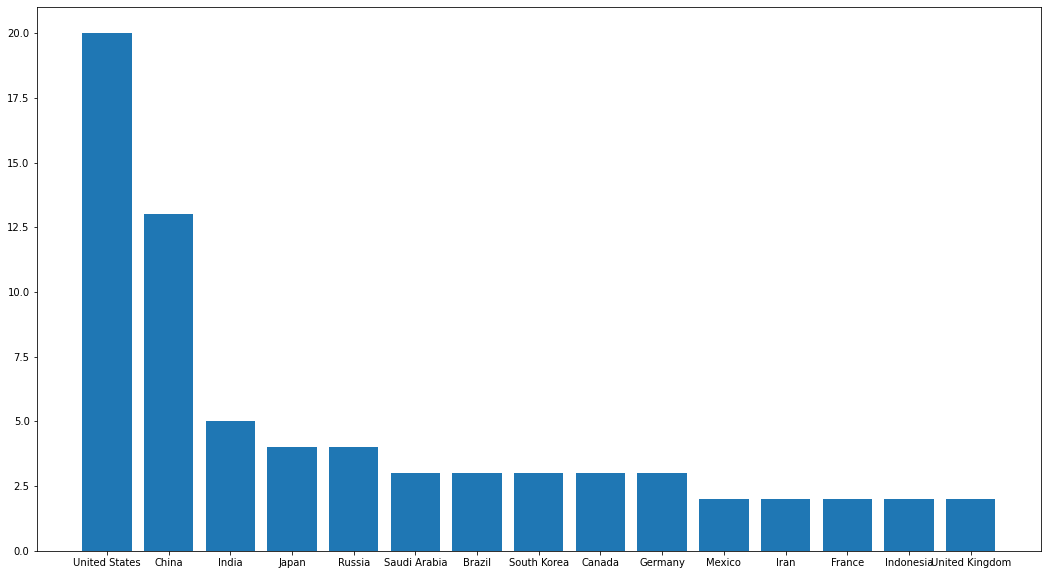

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.bar(Prominent_country, World_share_prominent)


## Importing seaborn library and graphing the above data 

<AxesSubplot:title={'center':'Countries with market share greater than or equl to 1%'}>

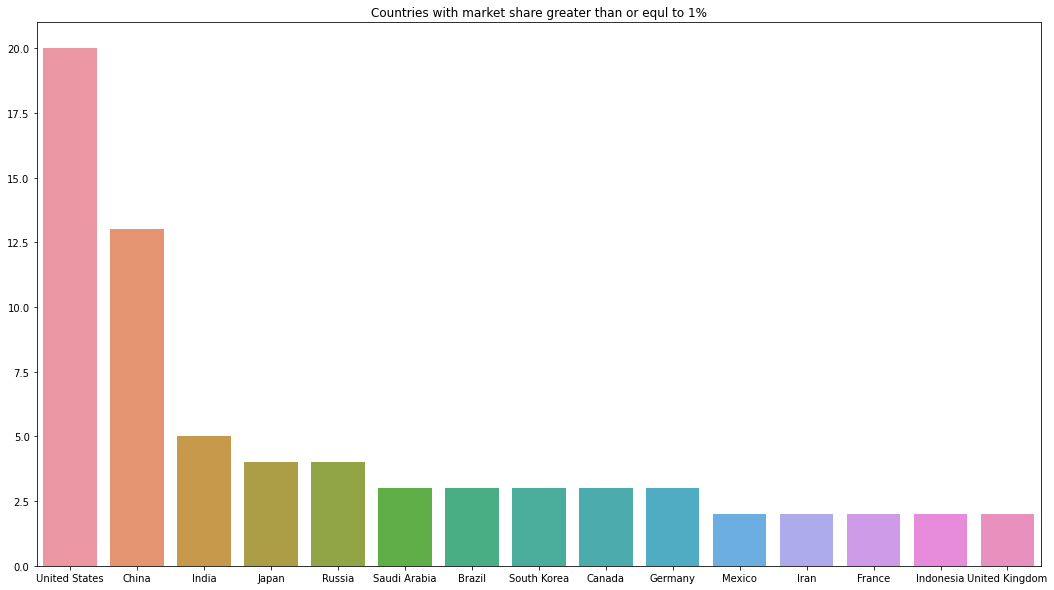

In [9]:
import seaborn as sns
plt.figure(figsize=(18, 10))
plt.title("Countries with market share greater than or equl to 1%")
sns.barplot(x = Prominent_country, y = World_share_prominent)